Preparación de Datos

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

colors = ['crimson', 'tomato', 'darkturquoise', 'palegreen', 'gold', 'dodgerblue', 'violet', 'cornflowerblue', 'mediumvioletred']

# Cargamos el Dataset
data = pd.concat([pd.read_csv('./data/278k_song_labelled.csv'),
                  pd.read_csv('./data/278k_labelled_uri.csv')], axis=1)

# Convertimos los datos a un DataFrame
df = pd.DataFrame(data)

# Eliminamos las columnas repetidas
df = df.loc[:,~df.columns.duplicated()]

# Eliminamos Unnamed: 0.1
df = df.drop(['Unnamed: 0.1'], axis=1)

# Al no haber datos nulos, podemos continuar con la preparación de los datos
# No utilizaremos las columnas de spec_rate y labels, por lo que las eliminamos
df = df.drop(['spec_rate'], axis=1)

# Renombramos columnas para manipularlas
df = df.rename(columns={ 'Unnamed: 0': 'track index', 'uri': 'track uri', 'labels': 'mood'})

# Creamos una nueva columna que contiene la duracion la cancion en minutos y segundos para poder interpretarla de mejor manera, sin embargo seguiremos utilizando los ms para el analisis de los datos
df['duration (mm:ss)'] = pd.to_timedelta(df['duration (ms)'], unit='ms')
# utilizamos una funcion lambda para que la duracion solo muestre minutos y segundos
df['duration (mm:ss)'] = df['duration (mm:ss)'].apply(lambda x: f'{int(x.total_seconds() // 60):02d}:{int(x.total_seconds() % 60):02d}')
# utilizamos la funcion lambda para indicar que mood representa el estado de animo de la cancion
display(df)

# Hacemos un diccionario para mapear los estados de animo a valores numericos
emotions_mapping = {'sad': 0, 'happy': 1, 'energetic': 2, 'calm': 3}
# Invertimos el mapeo para poder interpretar los datos
inverted_emotions_mapping = {v: k for k, v in emotions_mapping.items()}
# Mapeamos los estados de animo a valores numericos
df['mood'] = df['mood'].map(inverted_emotions_mapping)

# indicamos el indice de la cancion
df.set_index('track index', inplace=True)

display(df)

# Para hacer los graficos necesitamos limitar a 1000 los datos
df_graphics = df.head(1000)

# Hacemos un subset para cada mood
sad = df[df['mood'] == 'sad']
happy = df[df['mood'] == 'happy']
energetic = df[df['mood'] == 'energetic']
calm = df[df['mood'] == 'calm']

print(f"Sad songs {sad.value_counts().sum()}")
print(f"Happy songs {happy.value_counts().sum()}")
print(f"Energetic songs {energetic.value_counts().sum()}")
print(f"Calm songs {calm.value_counts().sum()}")

,track index,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mood,track uri,duration (mm:ss)
0,0,195000.0,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,2,spotify:track:3v6sBj3swihU8pXQQHhDZo,03:15
1,1,194641.0,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO,03:14
2,2,217573.0,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,1,spotify:track:2CY92qejUrhyPUASawNVRr,03:37
3,3,443478.0,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,0,spotify:track:11BPfwVbB7vok7KfjBeW4k,07:23
4,4,225862.0,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx,03:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277933,277933,276360.0,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1,spotify:track:6wLr2oR8eqUG5Beleh2Crm,04:36
277934,277934,284773.0,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,1,spotify:track:5mYtpXrZZ1bbGJYDGC8I0Y,04:44
277935,277935,241307.0,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,2,spotify:track:7FwBtcecmlpc1sLySPXeGE,04:01
277936,277936,234333.0,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1,spotify:track:2olVm1lHicpveMAo4AUDRB,03:54


,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mood,track uri,duration (mm:ss)
track index,,,,,,,,,,,,,
0,195000.0,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,energetic,spotify:track:3v6sBj3swihU8pXQQHhDZo,03:15
1,194641.0,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,happy,spotify:track:7KCWmFdw0TzoJbKtqRRzJO,03:14
2,217573.0,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,happy,spotify:track:2CY92qejUrhyPUASawNVRr,03:37
3,443478.0,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,sad,spotify:track:11BPfwVbB7vok7KfjBeW4k,07:23
4,225862.0,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,happy,spotify:track:3yUJKPsjvThlcQWTS9ttYx,03:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277933,276360.0,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,happy,spotify:track:6wLr2oR8eqUG5Beleh2Crm,04:36
277934,284773.0,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,happy,spotify:track:5mYtpXrZZ1bbGJYDGC8I0Y,04:44
277935,241307.0,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,energetic,spotify:track:7FwBtcecmlpc1sLySPXeGE,04:01


Sad songs 82058
Happy songs 106429
Energetic songs 47065
Calm songs 42386


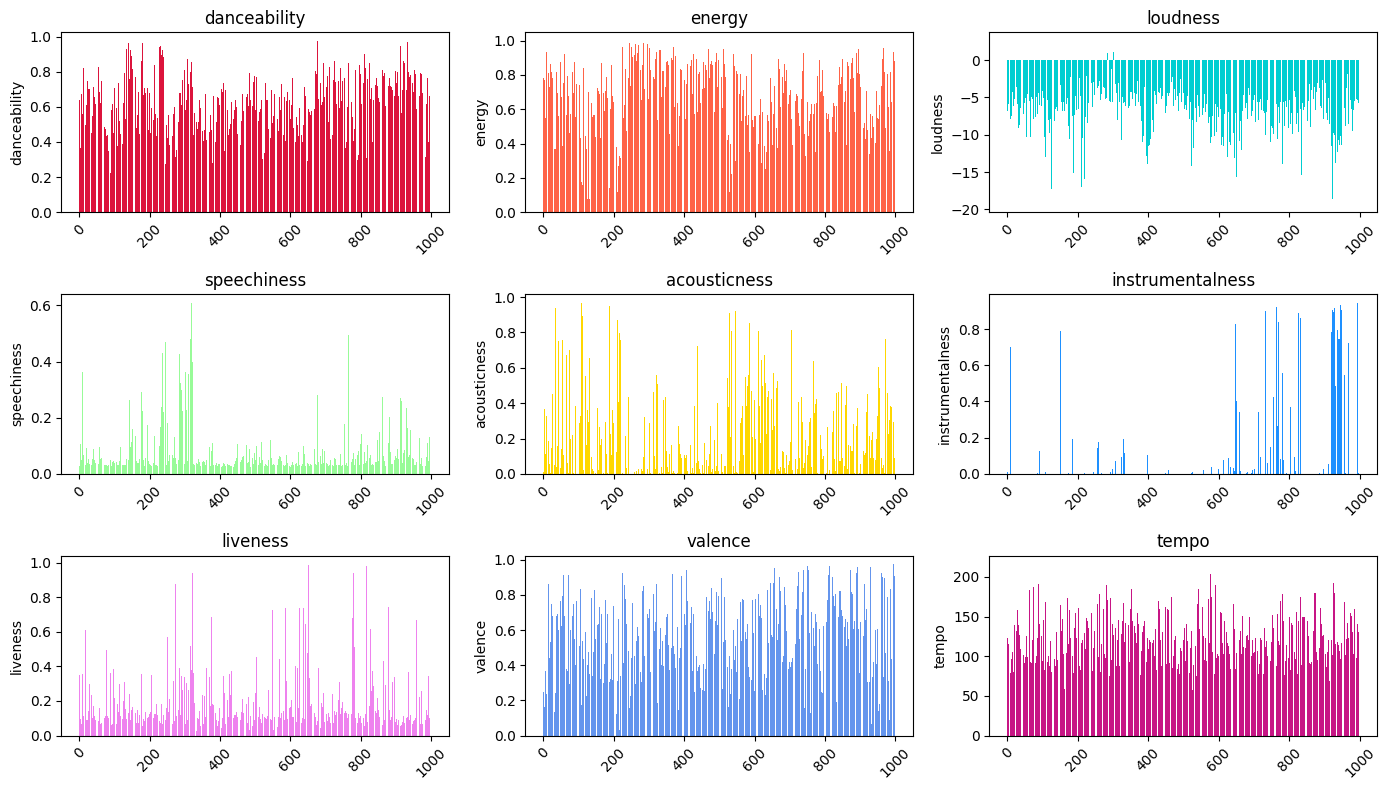

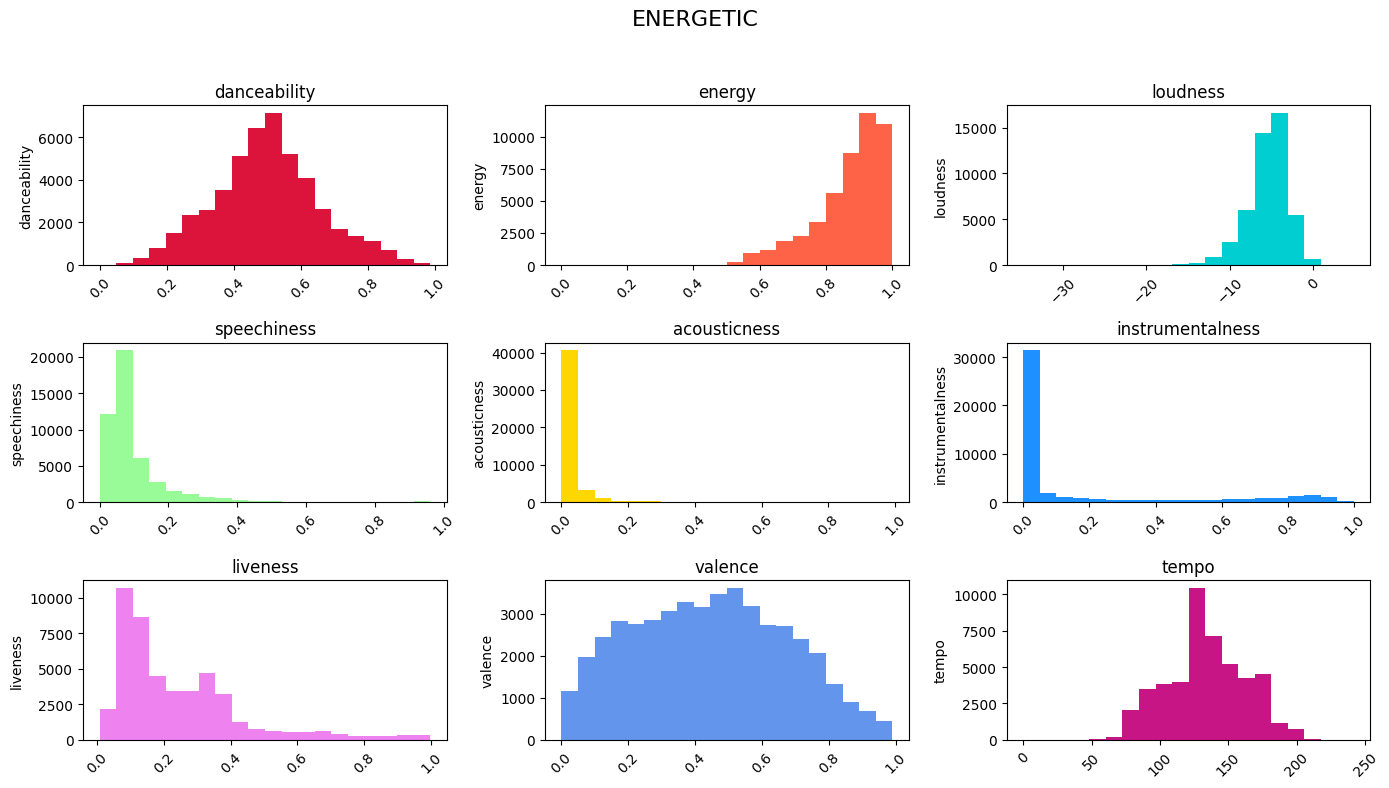

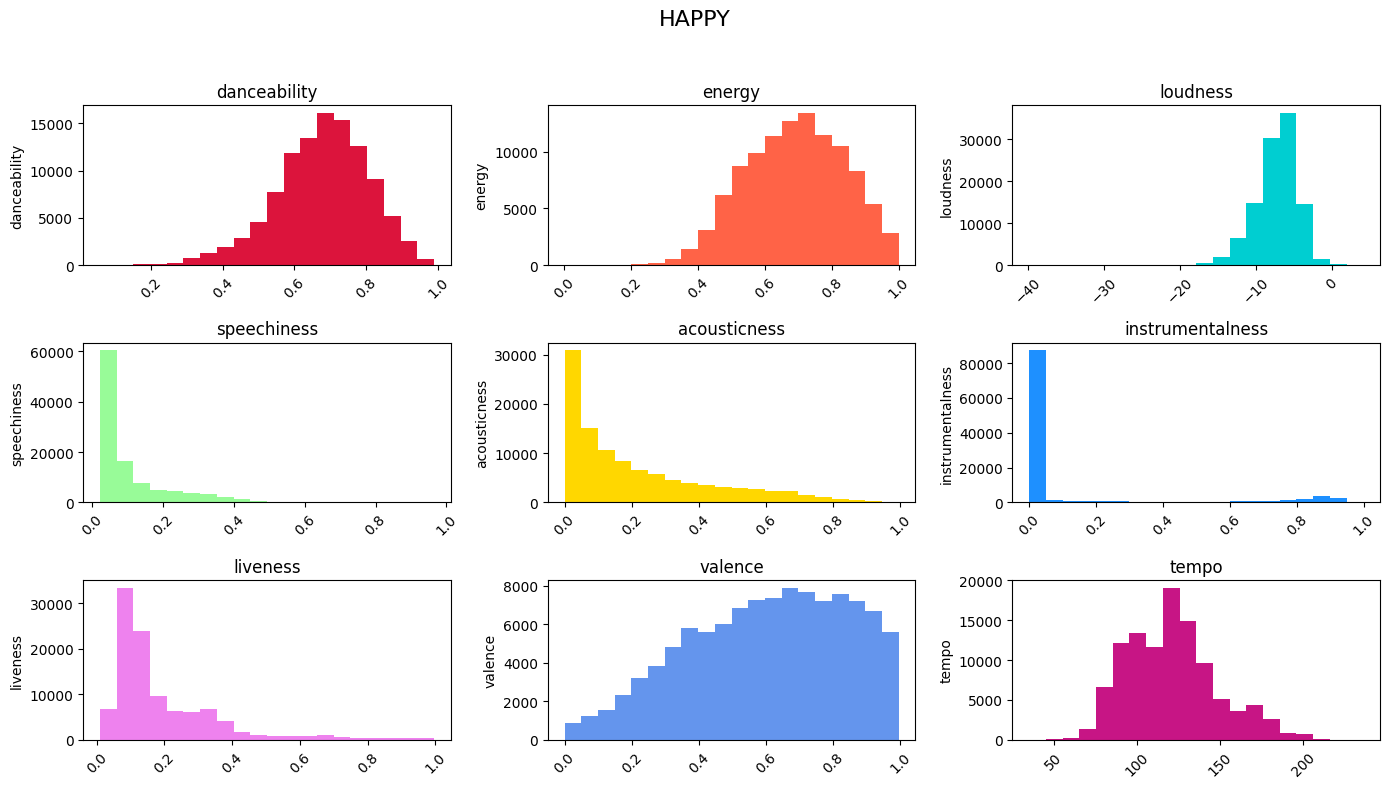

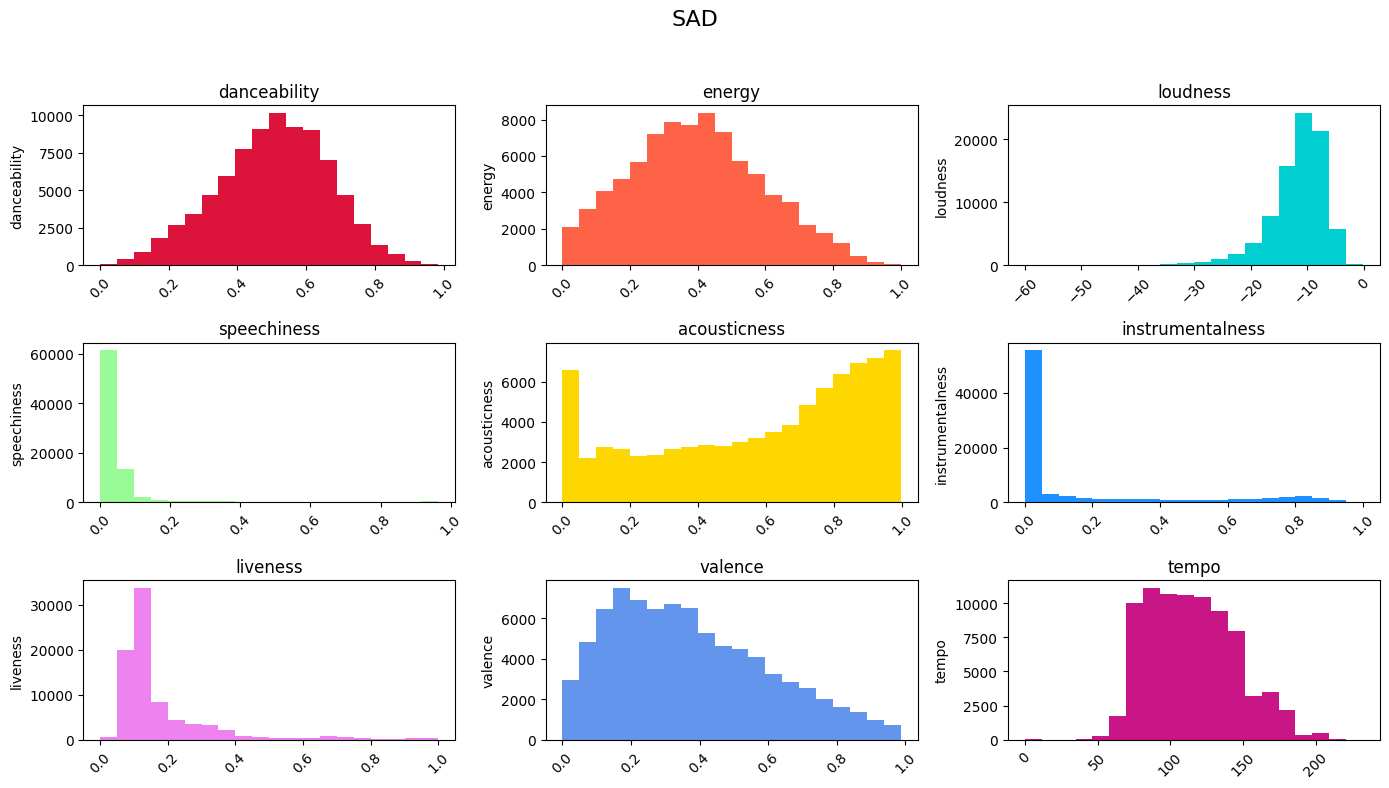

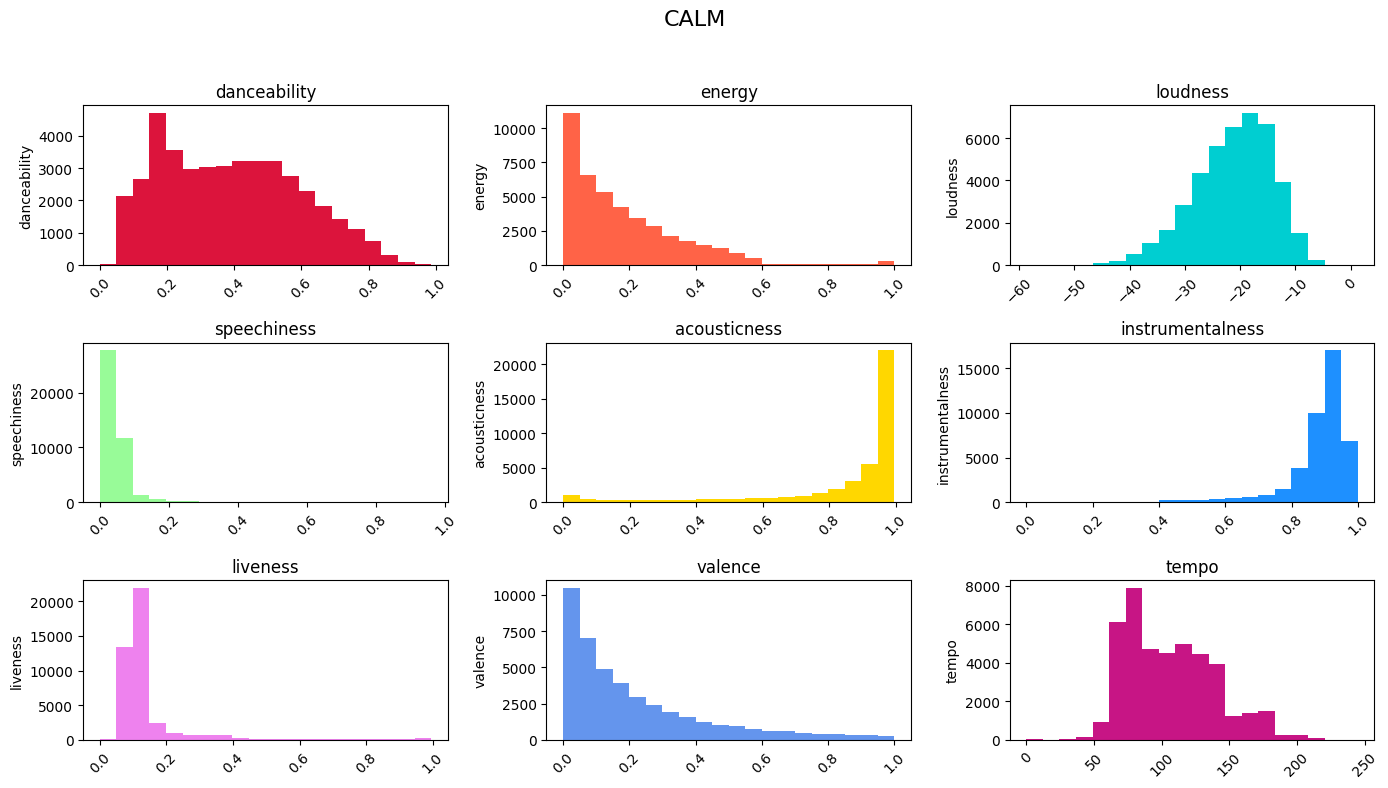

In [7]:
# Para comenzar a clasificar datos, creamos una nueva columna para catgorizar por valores de la mediana
attributes = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(14, 8))

# Creamos una grafica para cada una de las caracteristicas, limitamos el DataFrame a 1000 datos, ya que son bastantes los datos del DataFrame
for i, attribute in enumerate(attributes):
    plt.subplot(3, 3, i + 1)
    plt.bar(df_graphics.index, df_graphics[attribute], color=colors[i])
    plt.title(attribute)
    plt.ylabel(attribute)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Ahora graficamos cada una de las caracteristicas por mood en un solo grafico
for mood in df['mood'].unique():
    plt.figure(figsize=(14, 8))
    for i, attribute in enumerate(attributes):
        plt.subplot(3, 3, i + 1)
        plt.hist(df[df['mood'] == mood][attribute], bins=20, color=colors[i])
        plt.title(attribute)
        plt.ylabel(attribute)
        plt.xticks(rotation=45)
    
    plt.suptitle(mood.upper(), fontsize=16)  # Título principal con el valor de 'mood'
    plt.subplots_adjust(top=0.85)  # Ajusta para que no se superpongan el título y las gráficas
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para el título
    plt.show()

